# Task
Model Design: Build a model capable of predicting issues mentioned below as a minimal viable scope (more can also be accommodated):
Node or pod failures.
Resource exhaustion (CPU, memory, disk).
- Network or connectivity issues.
- Service disruptions based on logs and events.
Prediction Accuracy: Focus on developing models that accurately forecast potential failures using techniques such as anomaly detection, time-series analysis, and other applicable techniques.

Here is all the data you need:
"balanced_shuffled_traffic.csv"

## Data loading

### Subtask:
Load the data from "balanced_shuffled_traffic.csv" into a Pandas DataFrame.


**Reasoning**:
Load the data from "balanced_shuffled_traffic.csv" into a Pandas DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('balanced_shuffled_traffic.csv')
display(df.head())

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Segment Size Avg,Bwd Segment Size Avg,Subflow Fwd Bytes,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Total TCP Flow Time,Label
0,100.64.0.2-10.16.0.5-39486-8080-6,100.64.0.2,39486,10.16.0.5,8080,6,18:16.2,344,5,5,...,21.400000,27.400000,10,13,65280,505,1,32,344,0
1,100.64.0.2-10.16.0.15-34092-1880-6,100.64.0.2,34092,10.16.0.15,1880,6,04:51.0,386,6,4,...,65.666667,560.000000,39,224,64240,503,1,32,386,1
2,100.64.0.2-10.16.0.18-57432-3000-6,100.64.0.2,57432,10.16.0.18,3000,6,20:44.7,619,5,5,...,108.400000,36.000000,54,18,64240,502,1,32,619,0
3,10.16.0.6-144.122.71.18-60540-6642-6,10.16.0.6,60540,144.122.71.18,6642,6,58:10.4,1377,10,9,...,47.400000,1804.222222,24,854,65280,503,4,32,1377,1
4,100.64.0.2-10.16.0.18-52774-3000-6,100.64.0.2,52774,10.16.0.18,3000,6,36:39.0,819,5,5,...,93.400000,33.000000,46,16,64240,502,1,32,819,0


## Data exploration

### Subtask:
Explore the data to understand its structure, features, and potential issues.


**Reasoning**:
Analyze the data shape, data types, and statistical summary of the numerical features. Identify the target variable and analyze its distribution.



In [2]:
# Data Shape and Summary
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics of Numerical Features:\n", df.describe())

# Target Variable Analysis
target_variable = "Label"
print(f"\nTarget Variable: {target_variable}")
print("\nDistribution of Target Variable:\n", df[target_variable].value_counts(normalize=True) * 100)

Data Shape: (8621, 60)

Data Types:
 Flow ID                        object
Src IP                         object
Src Port                        int64
Dst IP                         object
Dst Port                        int64
Protocol                        int64
Timestamp                      object
Flow Duration                   int64
Total Fwd Packet                int64
Total Bwd packets               int64
Total Length of Fwd Packet      int64
Total Length of Bwd Packet      int64
Fwd Packet Length Max           int64
Fwd Packet Length Mean        float64
Fwd Packet Length Std         float64
Bwd Packet Length Max           int64
Bwd Packet Length Mean        float64
Bwd Packet Length Std         float64
Flow Bytes/s                  float64
Flow Packets/s                float64
Flow IAT Mean                 float64
Flow IAT Std                  float64
Flow IAT Max                    int64
Flow IAT Min                    int64
Fwd IAT Total                   int64
Fwd IAT Mean 

**Reasoning**:
Explore the correlation between features and the target variable.



In [3]:
# Feature Correlation
correlation_matrix = df.corr()
print("\nCorrelation Matrix with Target Variable:\n", correlation_matrix[target_variable].sort_values(ascending=False))

# Visualize Correlation Matrix (optional, can be added if needed)
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

ValueError: could not convert string to float: '100.64.0.2-10.16.0.5-39486-8080-6'

**Reasoning**:
The previous attempt to calculate the correlation matrix failed because some columns contain string values. We need to calculate correlation only for numerical features. Also, we need to check for missing values and potential outliers.



In [4]:
# Feature Correlation (for numerical features only)
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
print("\nCorrelation Matrix with Target Variable (numerical features only):\n", correlation_matrix[target_variable].sort_values(ascending=False))


# Missing Values and Outliers
print("\nMissing Values:\n", df.isnull().sum() / len(df) * 100)

# Identify potential outliers (visual inspection of distributions for numerical features)
# for column in numerical_features.columns:
#   plt.figure()
#   plt.title(f"Distribution of {column}")
#   sns.boxplot(x=df[column])
#   plt.show()



Correlation Matrix with Target Variable (numerical features only):
 Label                         1.000000
Bwd Packet Length Std         0.167000
Bwd Packet Length Max         0.163218
Packet Length Max             0.156394
Packet Length Std             0.152957
Bwd Segment Size Avg          0.150387
Bwd Packet Length Mean        0.150387
Subflow Bwd Bytes             0.142293
Packet Length Mean            0.140134
Average Packet Size           0.140134
Packet Length Variance        0.129931
Flow Bytes/s                  0.105857
Total Length of Bwd Packet    0.043034
Dst Port                      0.033398
PSH Flag Count                0.032541
Flow IAT Max                  0.031663
Fwd IAT Max                   0.031579
Bwd IAT Max                   0.031187
Bwd PSH Flags                 0.030675
Protocol                      0.029421
Flow IAT Std                  0.027025
Fwd IAT Std                   0.023815
Bwd IAT Std                   0.023631
Bwd IAT Mean                  0.02

**Reasoning**:
Identify the relevant columns for predicting the target variables based on the correlation analysis and the data exploration.



In [5]:
# Relevant Columns Identification
# Based on the correlation matrix and the initial data exploration, we can identify the following columns as potentially relevant for prediction:
# - Features with higher correlation with the target variable (e.g., Bwd Packet Length Std, Bwd Packet Length Max, Packet Length Max).
# - Features that represent network traffic characteristics that might indicate potential issues (e.g., Flow Bytes/s, Flow Packets/s, Total Length of Bwd Packet).

# Note: This is a preliminary selection. Further feature engineering and selection might be needed to build a robust prediction model.

relevant_columns = [
    'Bwd Packet Length Std', 'Bwd Packet Length Max', 'Packet Length Max',
    'Flow Bytes/s', 'Flow Packets/s', 'Total Length of Bwd Packet', 'Label'
]

# Create a new DataFrame with only the relevant columns
df_relevant = df[relevant_columns]

print("DataFrame with Relevant Columns:\n", df_relevant.head())


DataFrame with Relevant Columns:
    Bwd Packet Length Std  Bwd Packet Length Max  Packet Length Max  \
0              61.268263                    137                137   
1            1120.000000                   2240               2240   
2              80.498447                    180                542   
3            2858.650284                   6740               6740   
4              73.790243                    165                467   

   Flow Bytes/s  Flow Packets/s  Total Length of Bwd Packet  Label  
0  7.093023e+05     29069.76744                         137      0  
1  6.823834e+06     25906.73575                        2240      1  
2  1.166397e+06     16155.08885                         180      0  
3  1.213653e+07     13798.11184                       16238      1  
4  7.716728e+05     12210.01221                         165      0  


## Data cleaning

### Subtask:
Clean the data by handling missing values, outliers, and inconsistencies.


**Reasoning**:
Check for missing values and handle them by removing rows with missing values.



In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove rows with missing values
df_cleaned = df.dropna()

# Print the shape of the dataframe after removing missing values
print(f"\nShape of dataframe after removing missing values: {df_cleaned.shape}")

Missing Values:
 Flow ID                       0
Src IP                        0
Src Port                      0
Dst IP                        0
Dst Port                      0
Protocol                      0
Timestamp                     0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Mean        0
Fwd Packet Length Std         0
Bwd Packet Length Max         0
Bwd Packet Length Mean        0
Bwd Packet Length Std         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Flow IAT Min                  0
Fwd IAT Total                 0
Fwd IAT Mean                  0
Fwd IAT Std                   0
Fwd IAT Max                   0
Fwd IAT Min                   0
Bwd IAT Total                 0
Bwd IAT Mean           

**Reasoning**:
Identify and handle outliers using boxplots for numerical features.



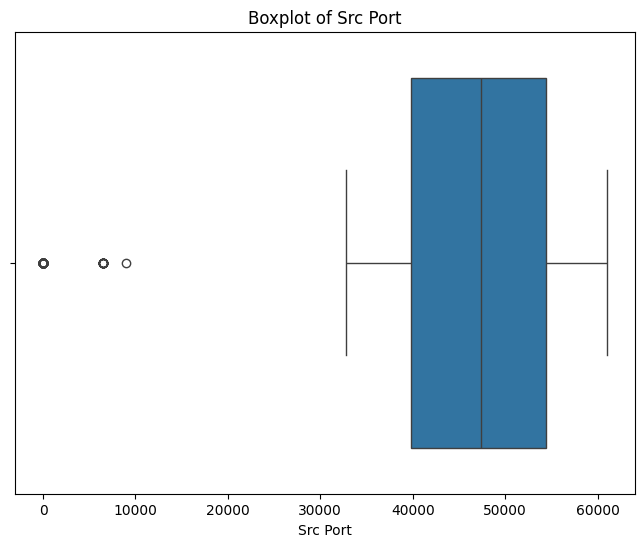

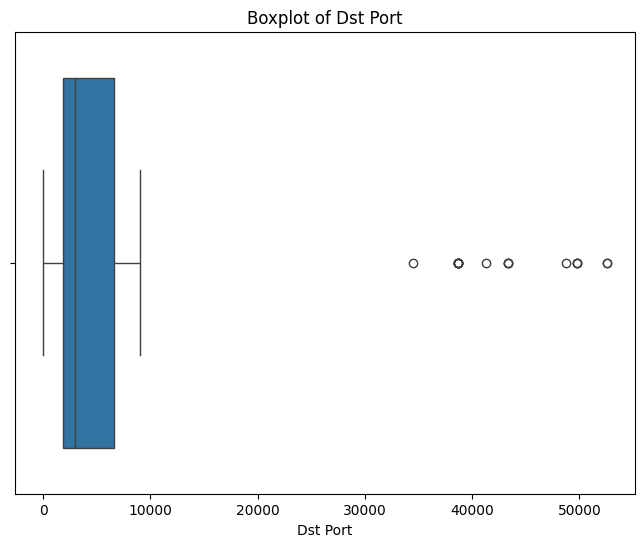

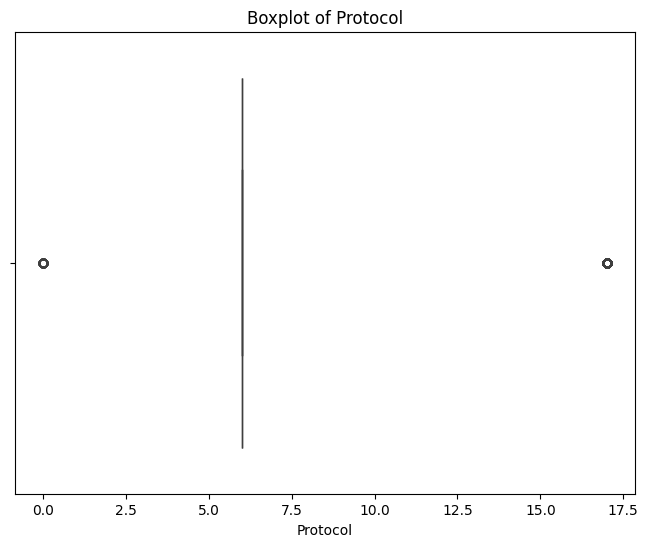

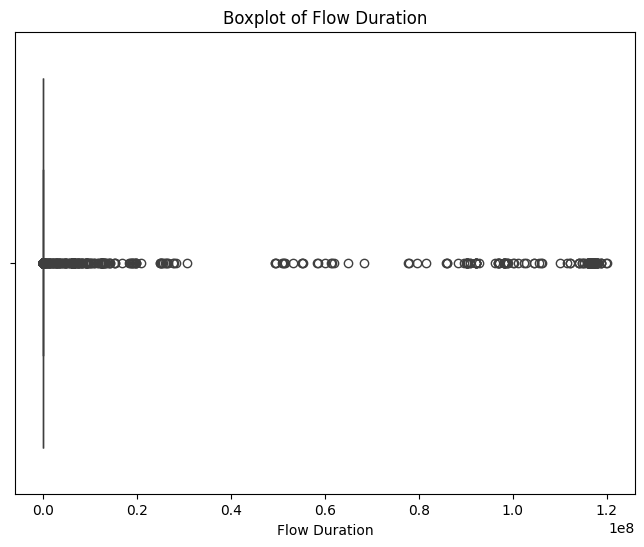

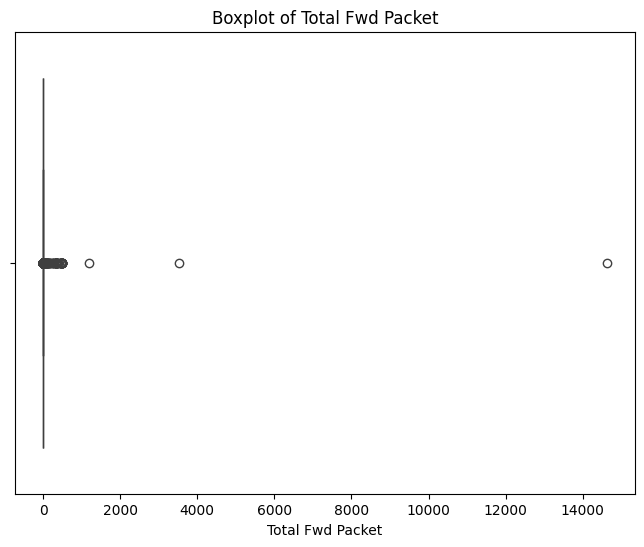

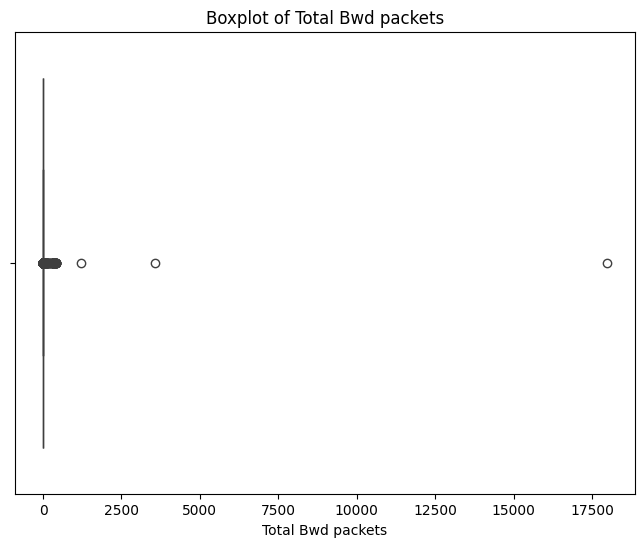

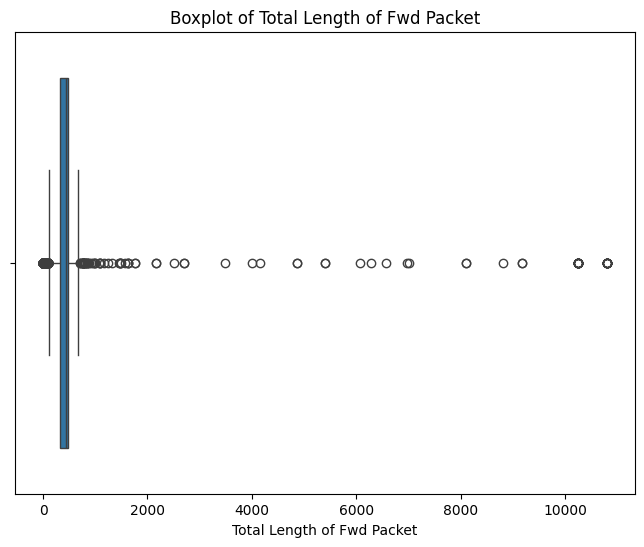

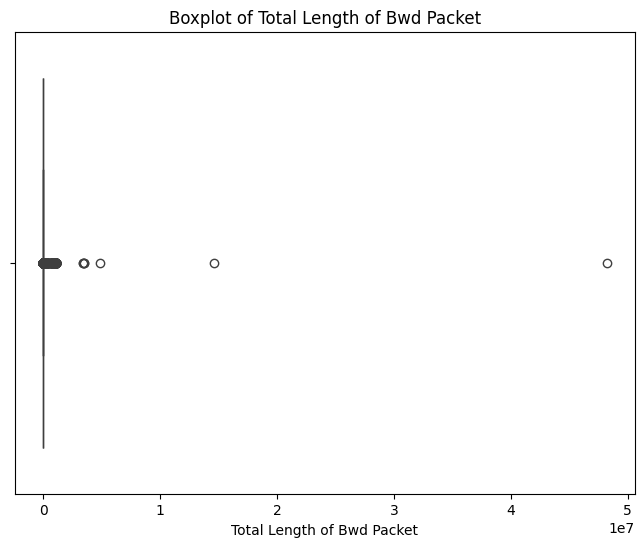

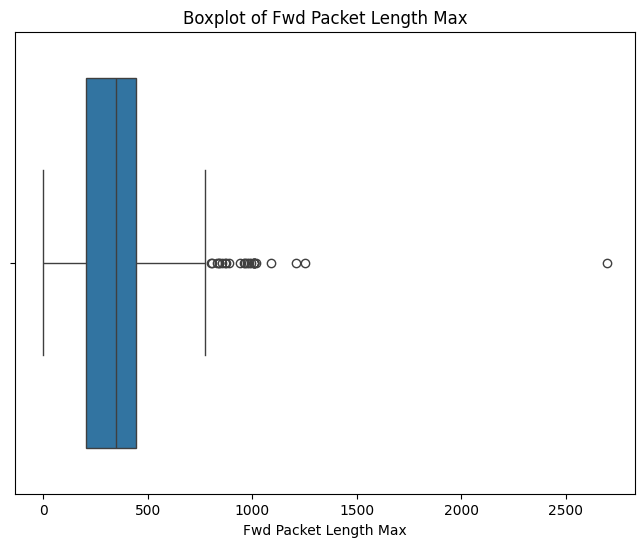

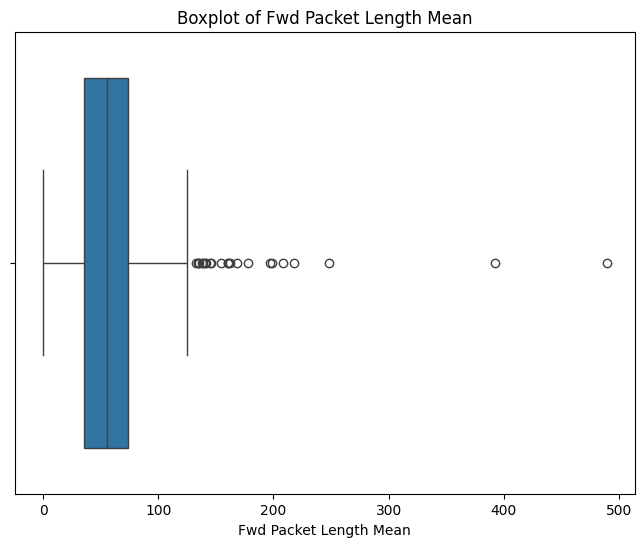

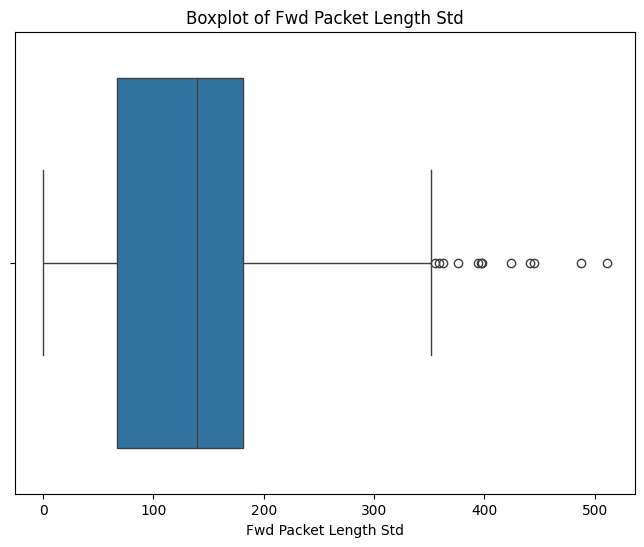

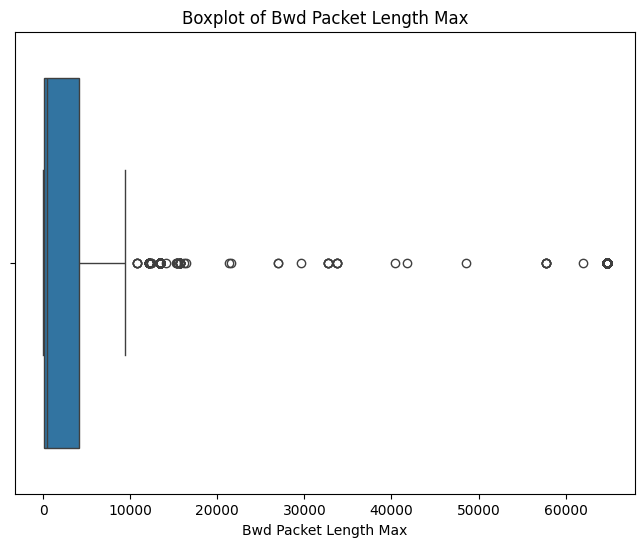

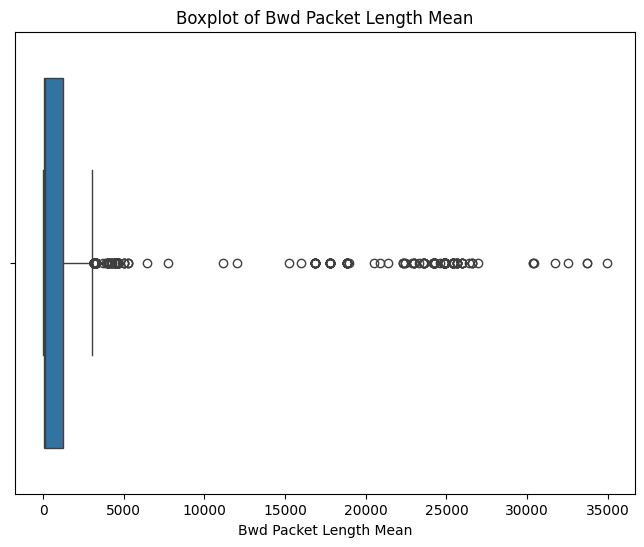

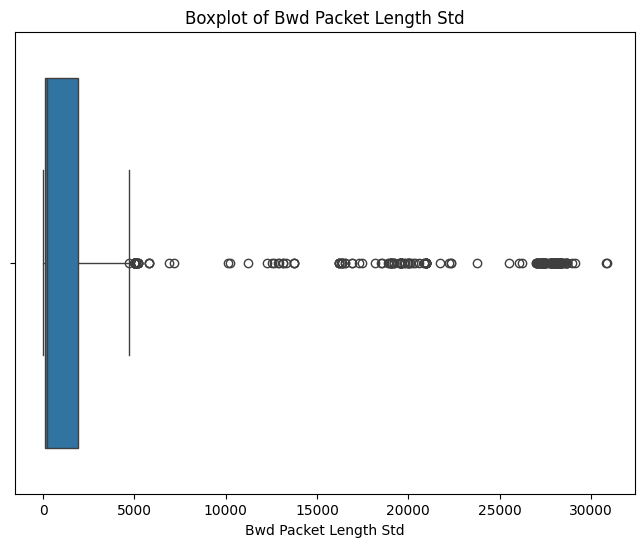

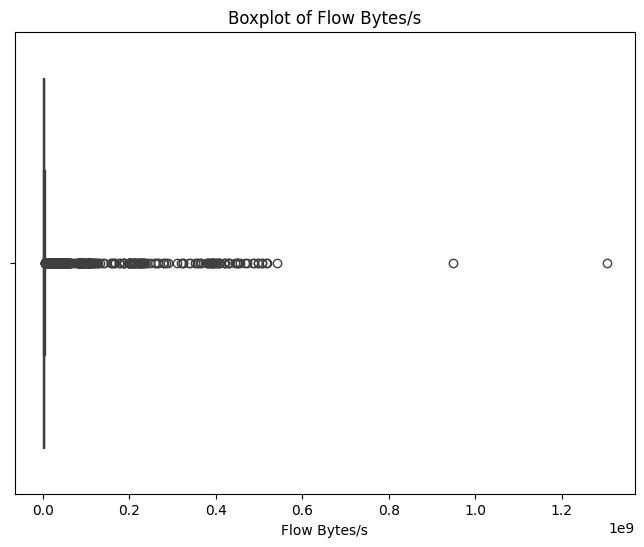

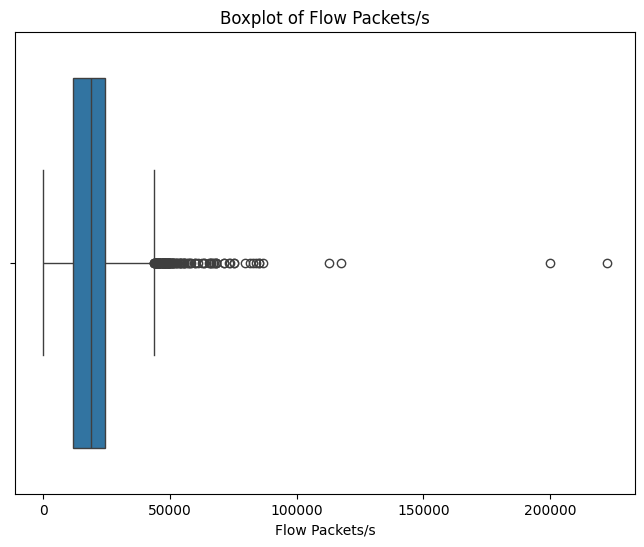

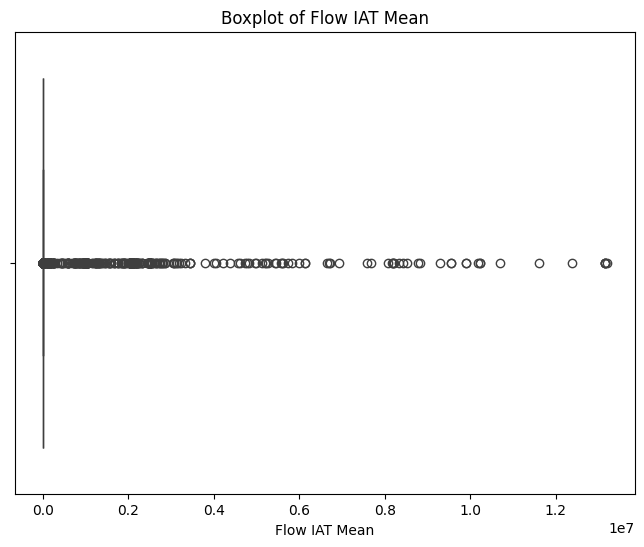

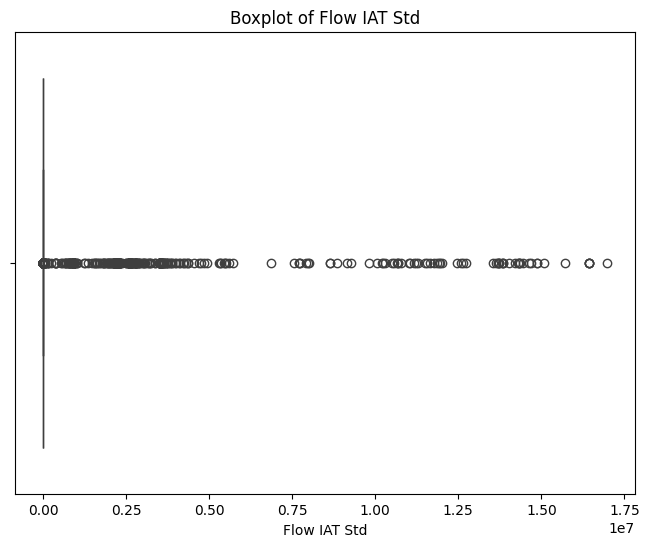

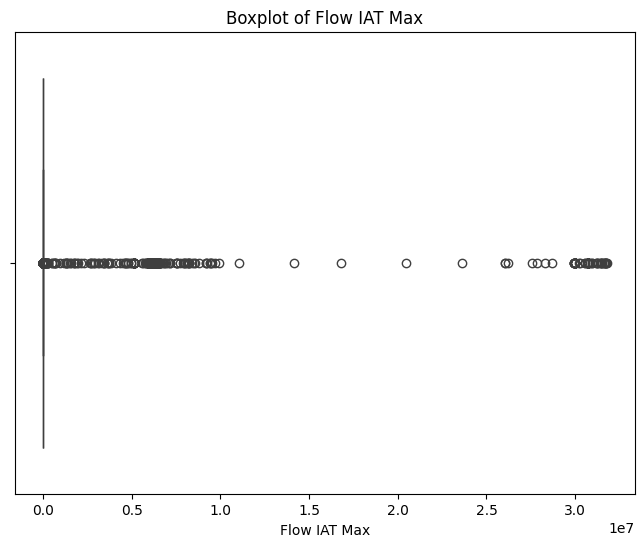

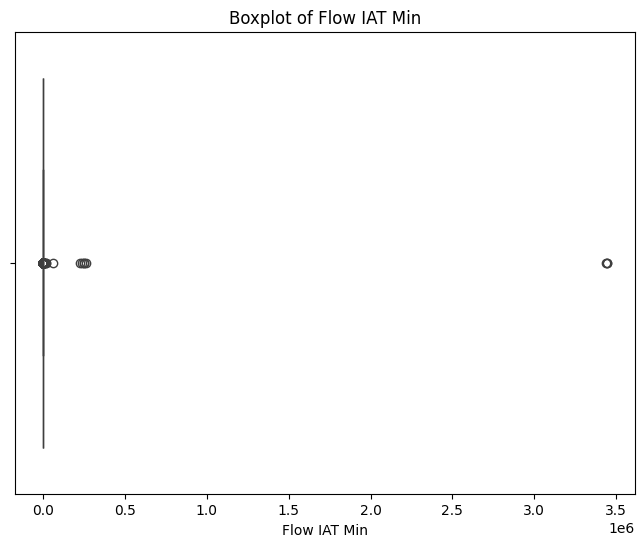

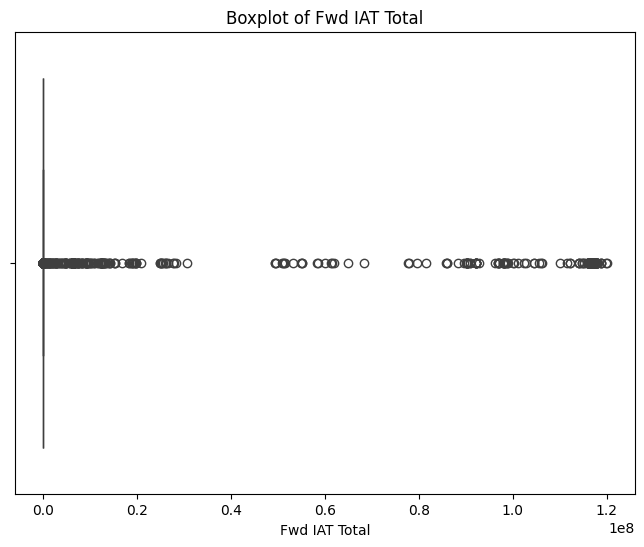

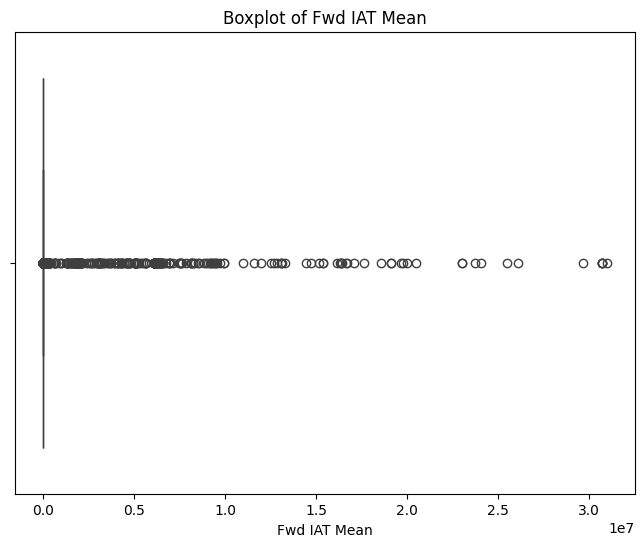

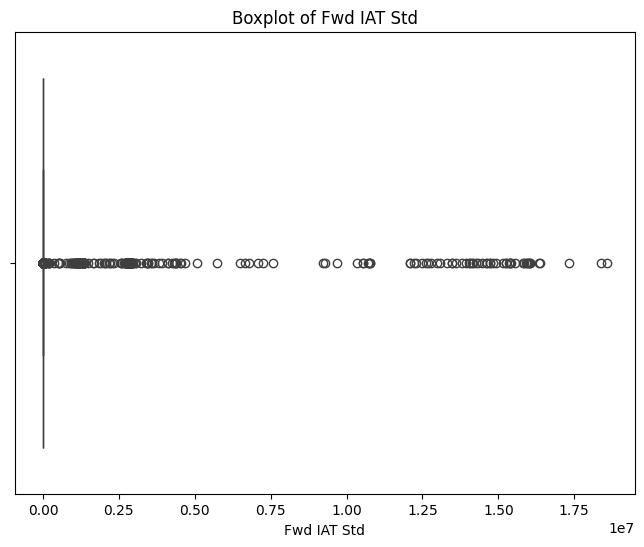

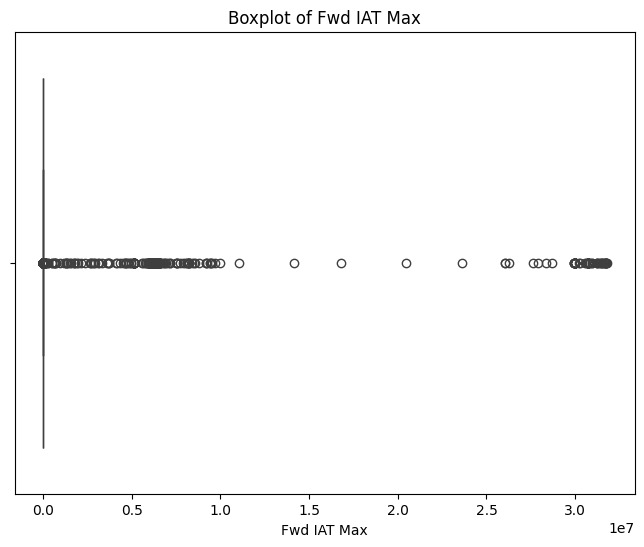

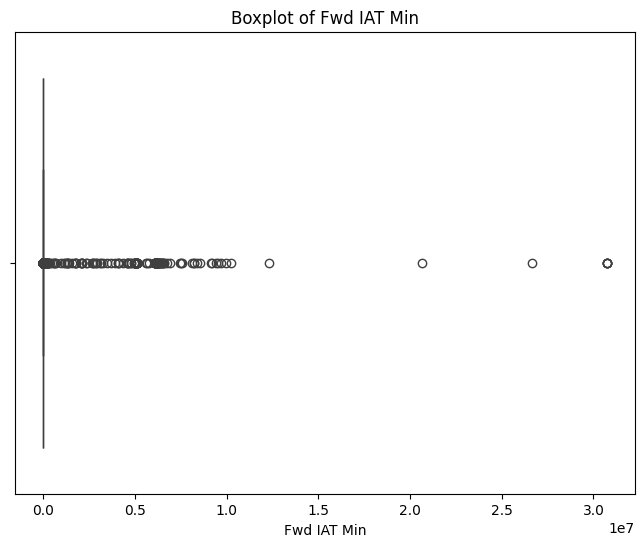

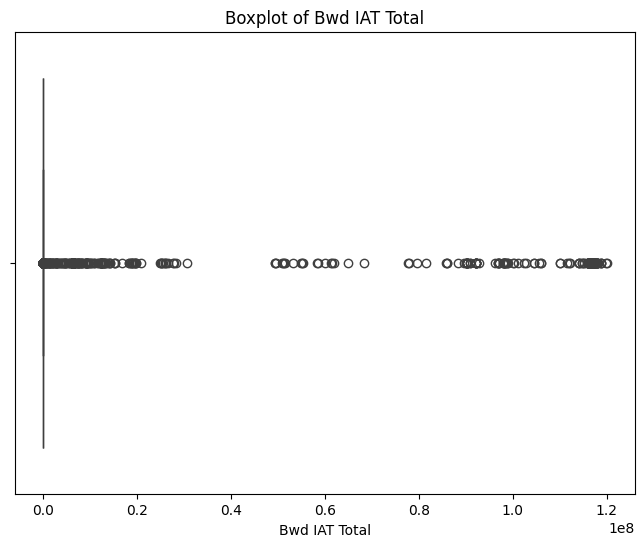

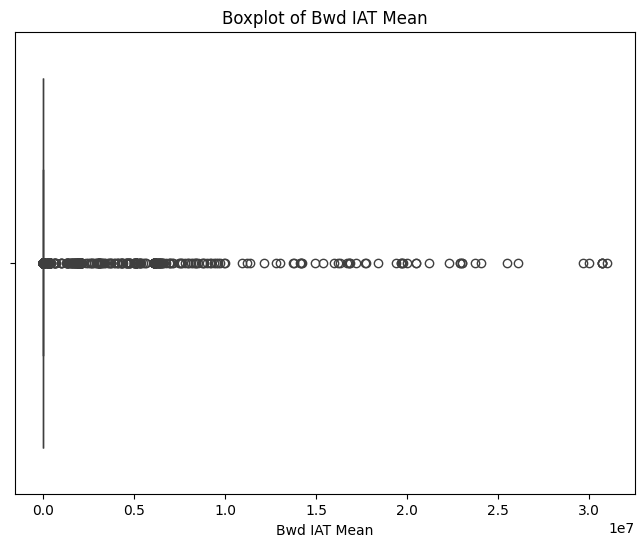

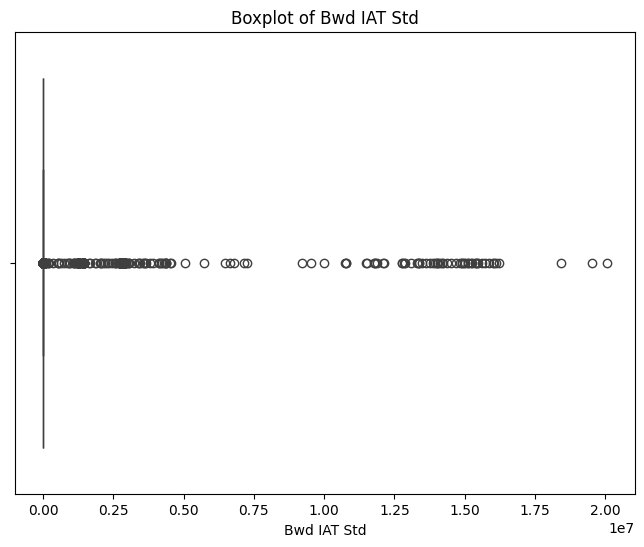

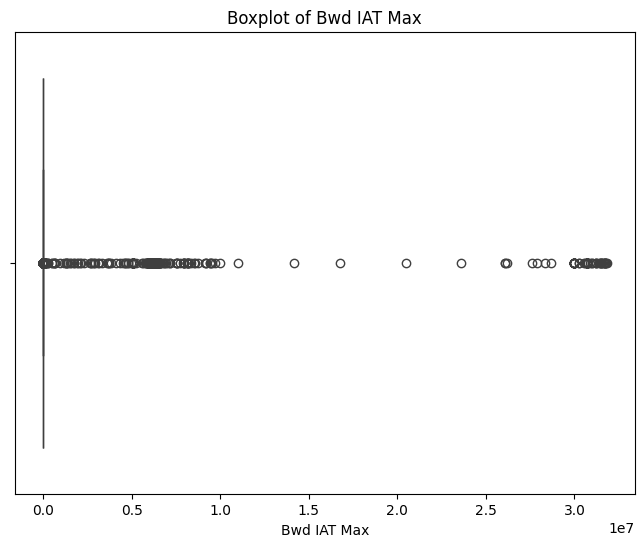

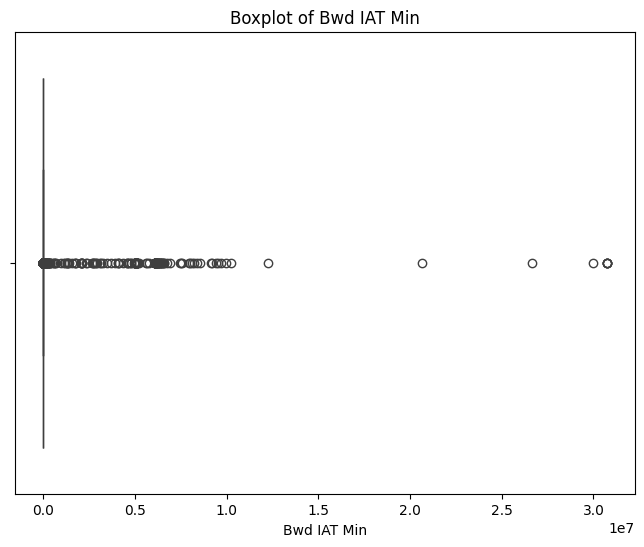

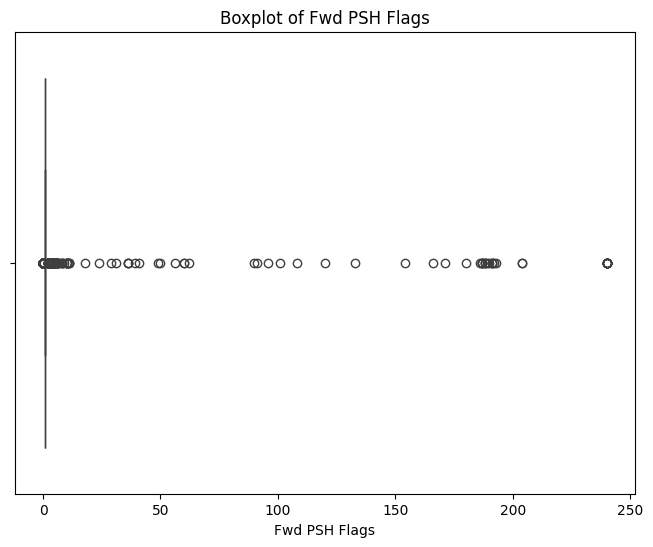

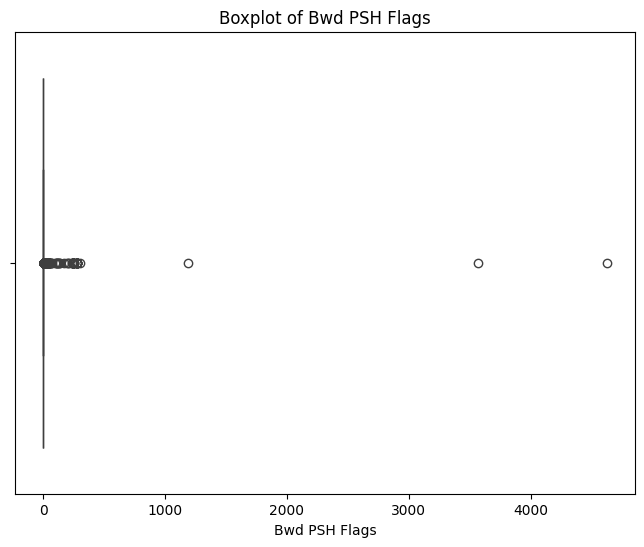

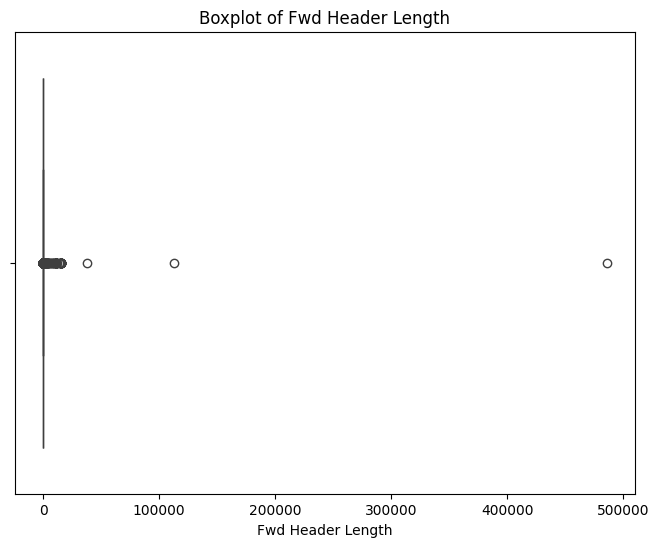

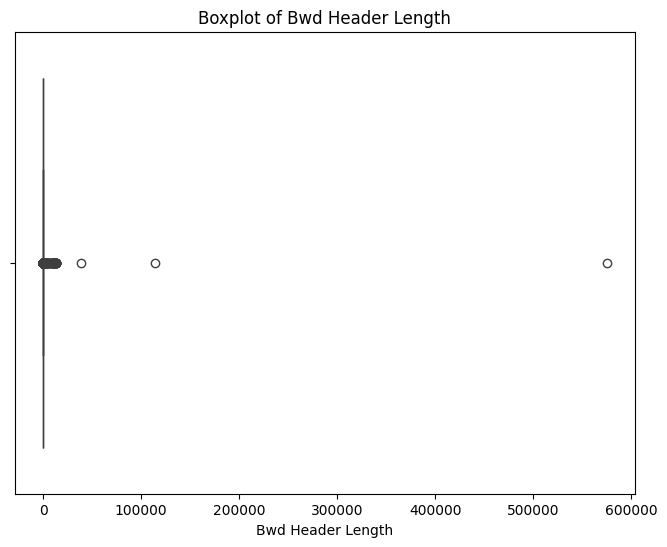

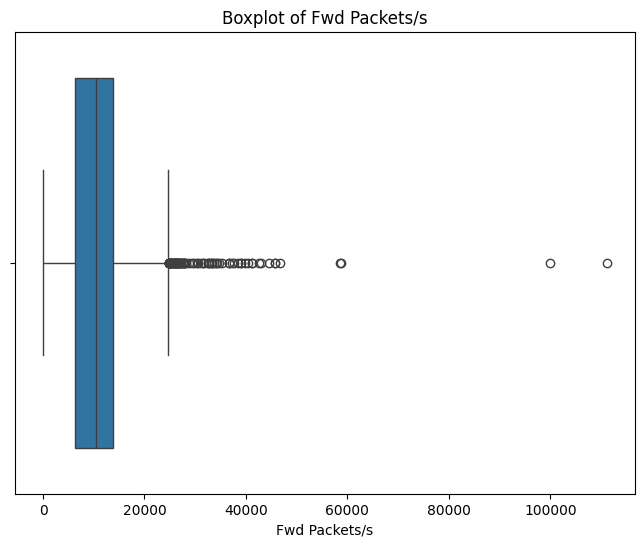

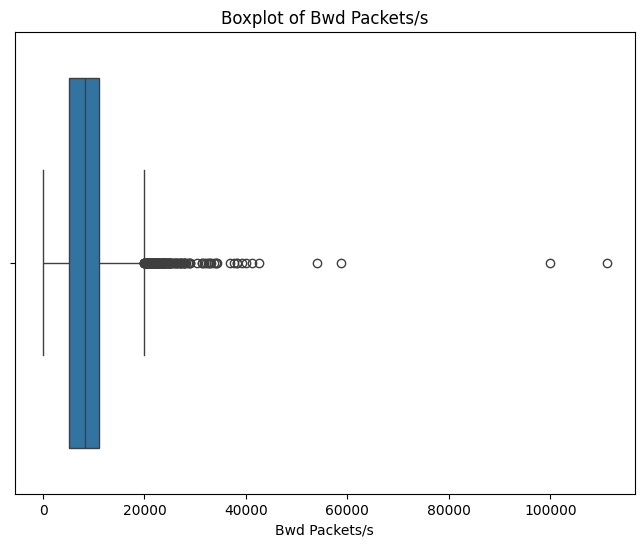

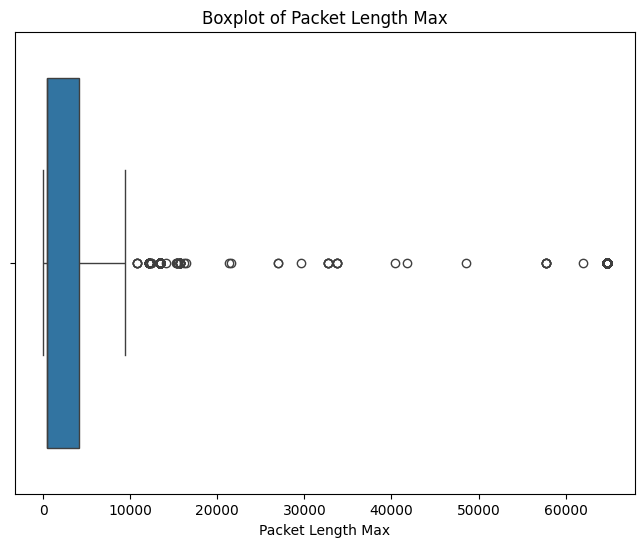

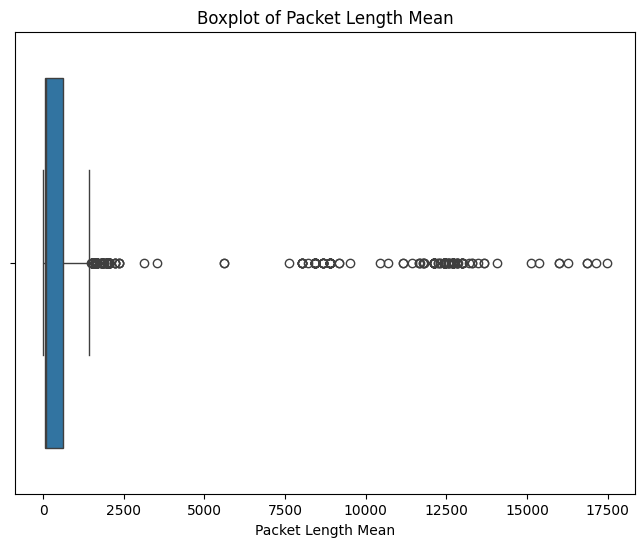

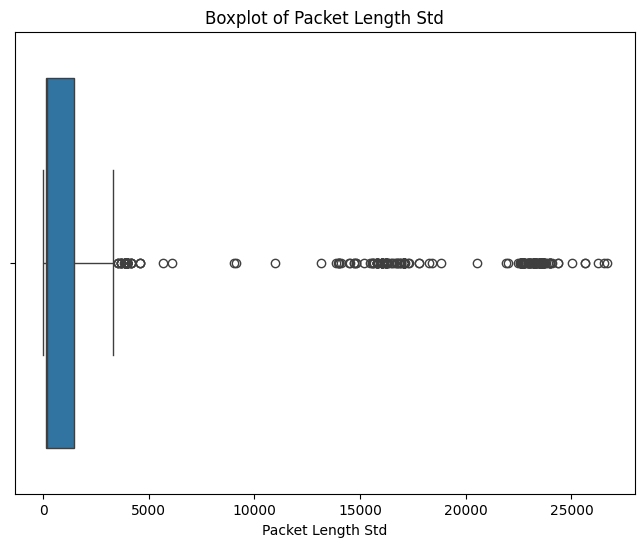

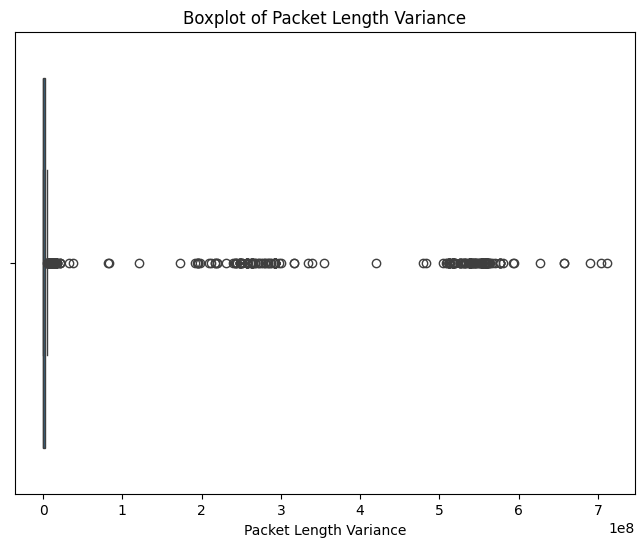

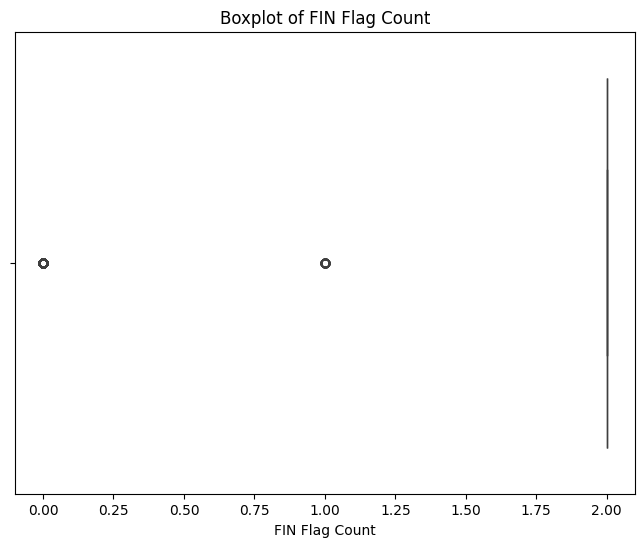

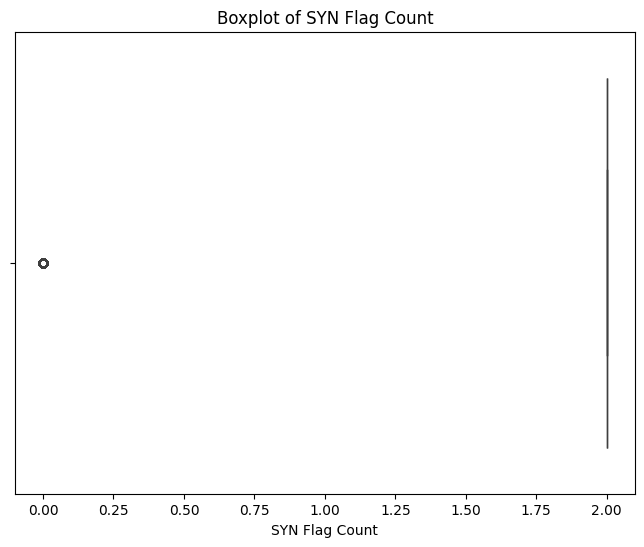

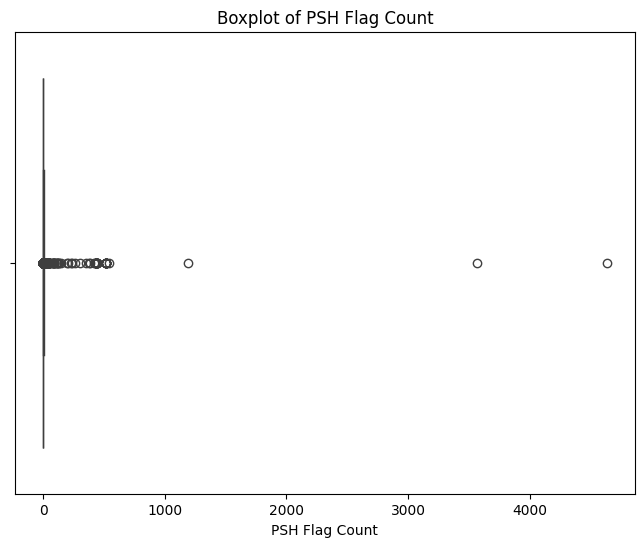

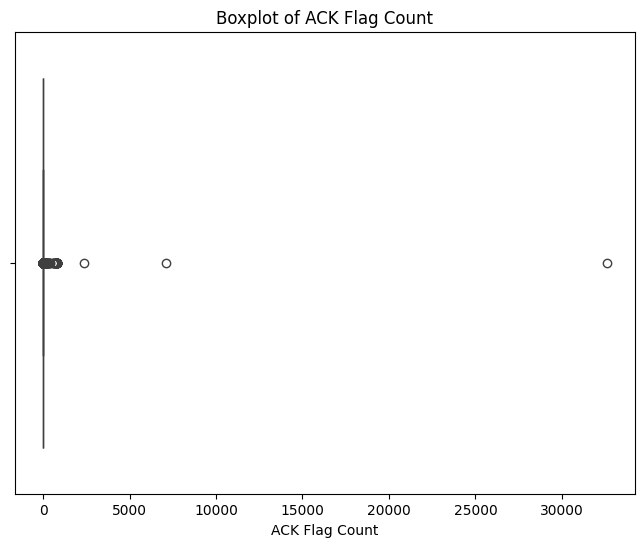

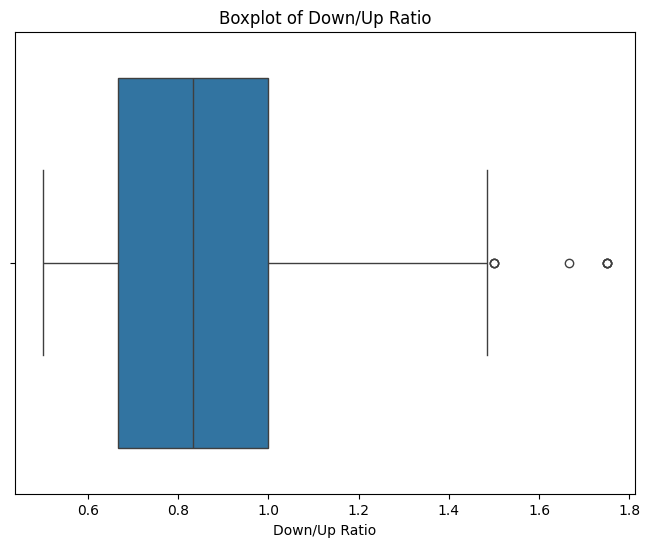

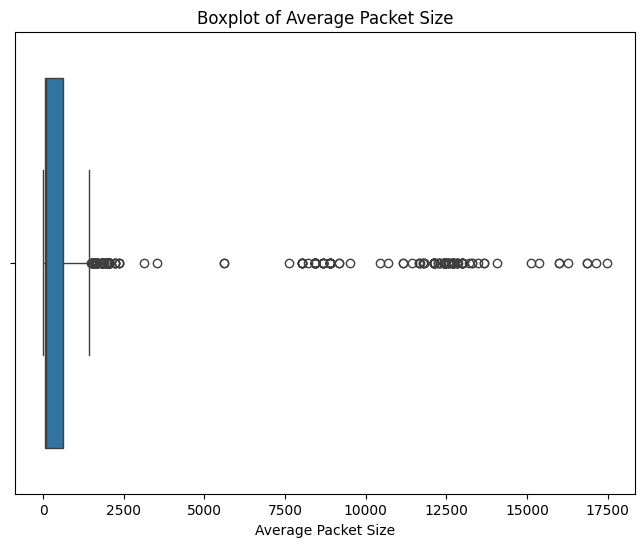

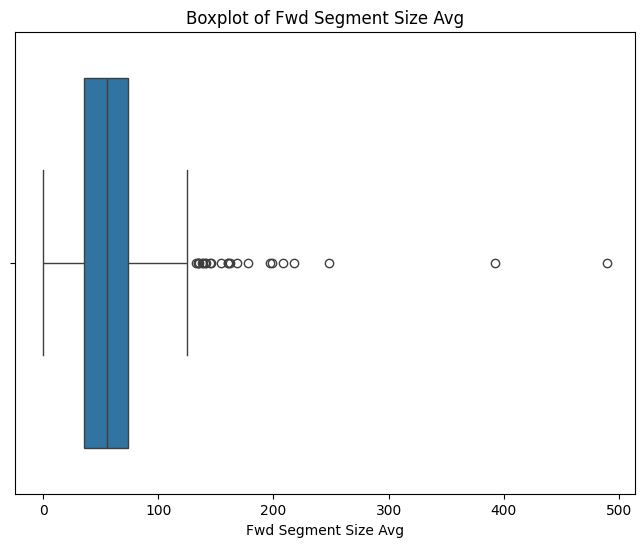

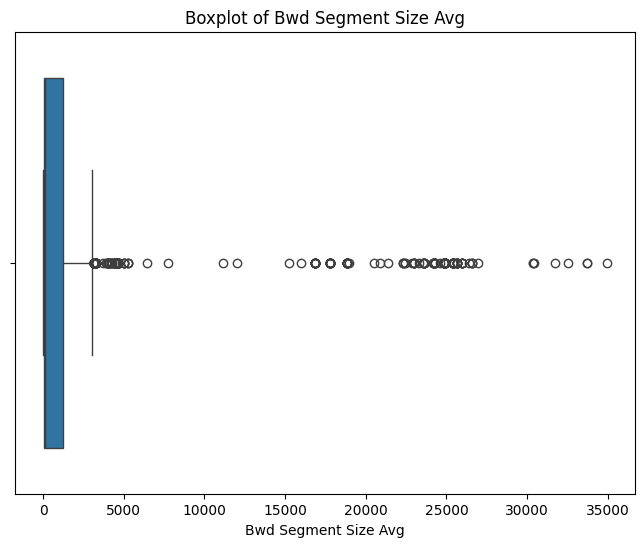

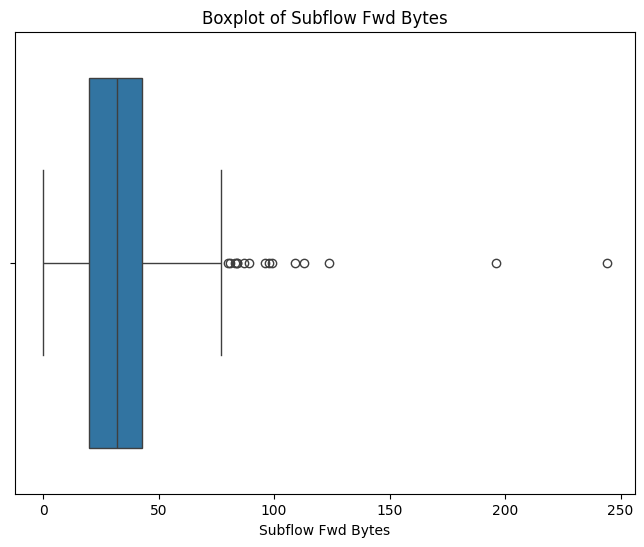

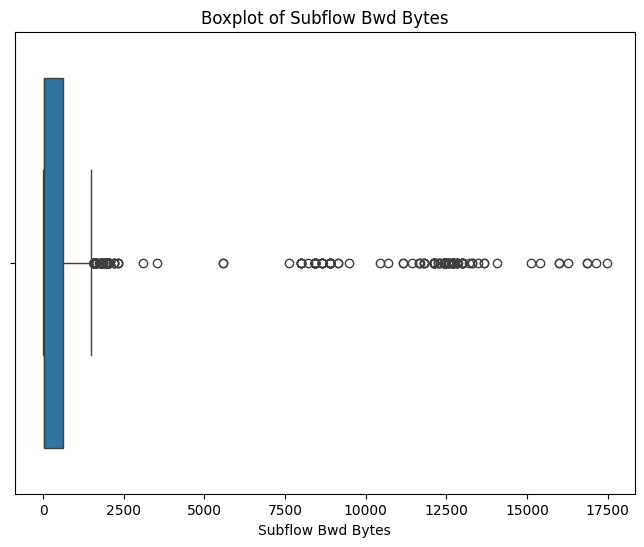

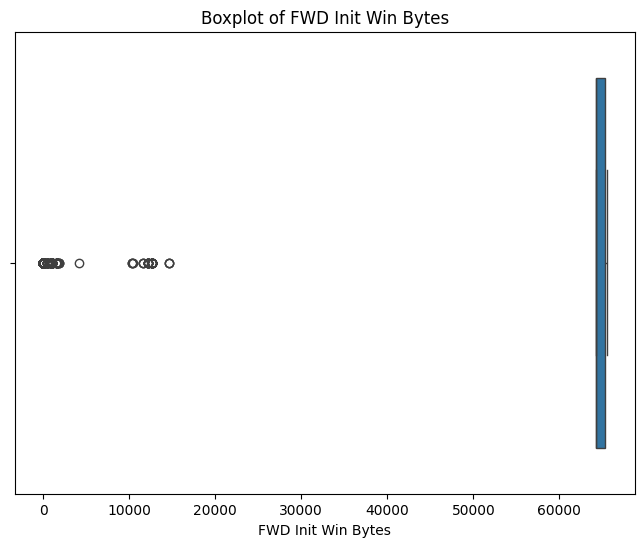

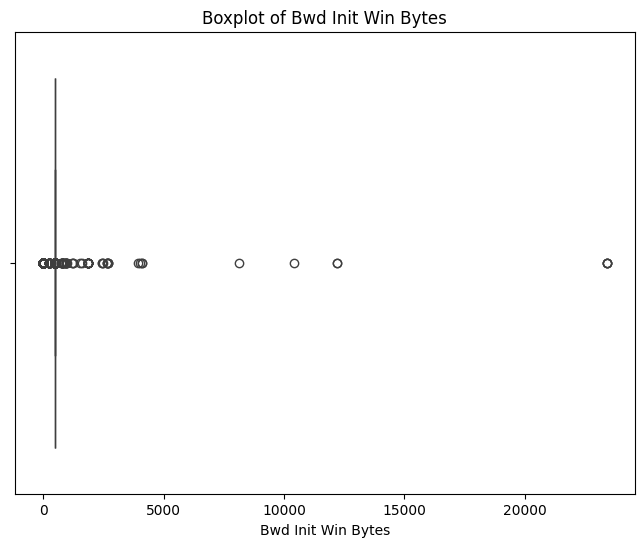

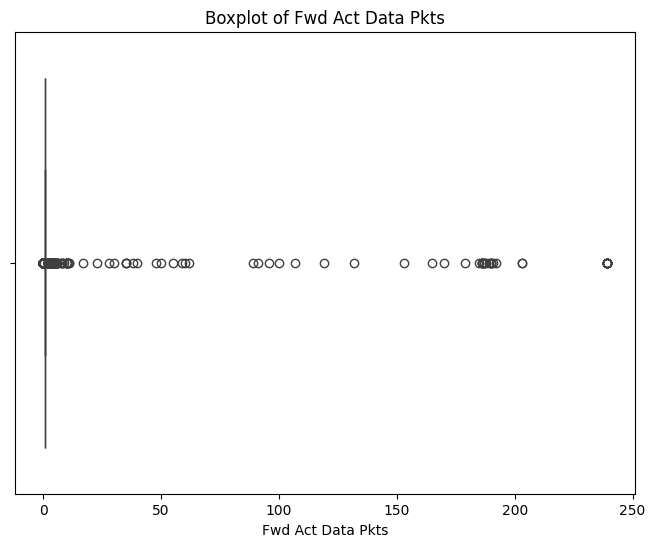

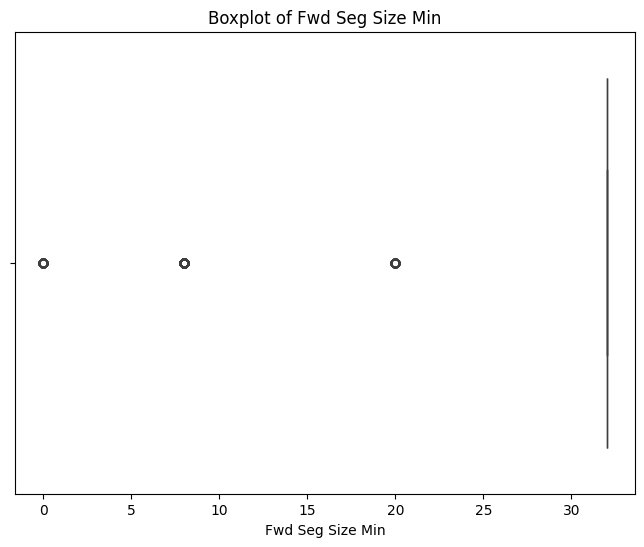

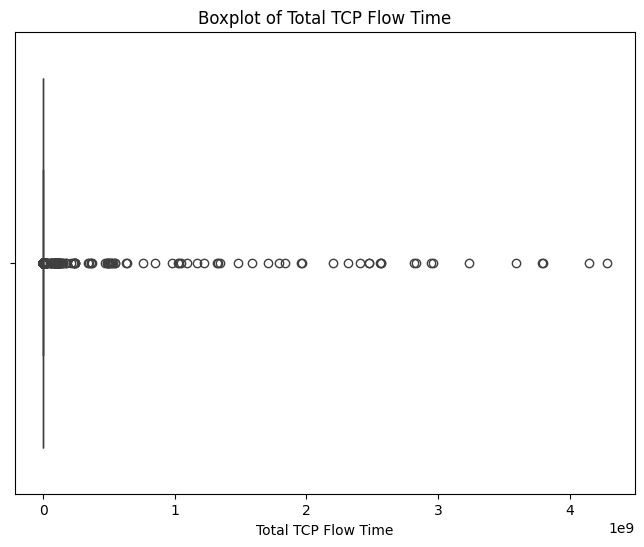

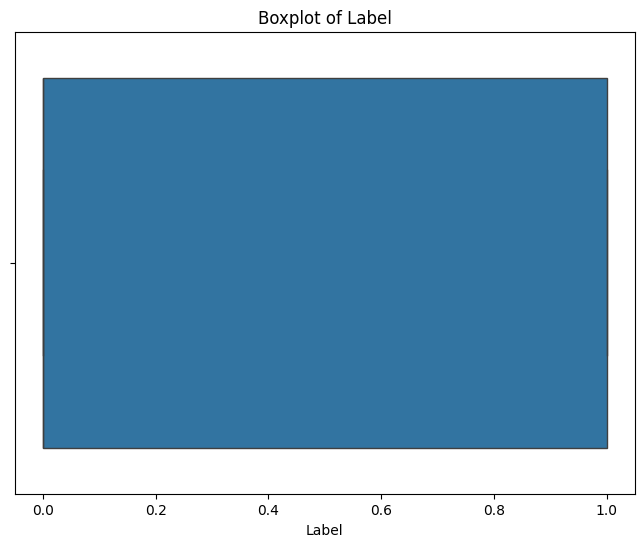

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = df_cleaned.select_dtypes(include=['number'])

# Create boxplots for each numerical feature to identify potential outliers
for column in numerical_features.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size if needed
  plt.title(f"Boxplot of {column}")
  sns.boxplot(x=df_cleaned[column])
  plt.show()

**Reasoning**:
Based on the boxplots, it appears that several features have outliers. We will handle these outliers by winsorizing the data, replacing values beyond a certain percentile with the value at that percentile.



In [8]:
import numpy as np

# Define the percentile for winsorization
percentile = 95

# Winsorize the numerical features
for column in numerical_features.columns:
  df_cleaned[column] = np.clip(df_cleaned[column], np.percentile(df_cleaned[column], 5), np.percentile(df_cleaned[column], percentile))

# Verify the changes by plotting the boxplots again (optional)
# for column in numerical_features.columns:
#   plt.figure(figsize=(8, 6))
#   plt.title(f"Boxplot of {column} after Winsorization")
#   sns.boxplot(x=df_cleaned[column])
#   plt.show()

**Reasoning**:
Check for inconsistencies in the data, such as typos, incorrect data types, or duplicate rows.



In [9]:
# Check for duplicate rows
duplicate_rows = df_cleaned[df_cleaned.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Check for inconsistent data types in columns
print("\nData Types:\n", df_cleaned.dtypes)

# Check for inconsistent spellings in categorical features (if any)
# For example, if you have a 'City' column, you can check for different spellings of the same city
# You can use value_counts() to see the unique values and identify inconsistencies
# Example: print(df_cleaned['City'].value_counts())

# Check for invalid values in numerical features
# For example, if you have an 'Age' column, you can check for negative ages
# You can use describe() to see the summary statistics and identify invalid values
# Example: print(df_cleaned['Age'].describe())

# If any inconsistencies are found, make necessary corrections or adjustments.
# For example, you can replace typos with the correct spellings, convert data types to the correct format,
# or remove duplicate rows.

Number of duplicate rows: 0

Data Types:
 Flow ID                        object
Src IP                         object
Src Port                        int64
Dst IP                         object
Dst Port                        int64
Protocol                        int64
Timestamp                      object
Flow Duration                   int64
Total Fwd Packet                int64
Total Bwd packets               int64
Total Length of Fwd Packet      int64
Total Length of Bwd Packet      int64
Fwd Packet Length Max           int64
Fwd Packet Length Mean        float64
Fwd Packet Length Std         float64
Bwd Packet Length Max           int64
Bwd Packet Length Mean        float64
Bwd Packet Length Std         float64
Flow Bytes/s                  float64
Flow Packets/s                float64
Flow IAT Mean                 float64
Flow IAT Std                  float64
Flow IAT Max                    int64
Flow IAT Min                    int64
Fwd IAT Total                   int64
Fwd IAT 

**Reasoning**:
Ensure data quality by checking the data types of each column and making sure they are consistent with the expected data types.



In [10]:
# Check for unexpected data types
print("\nData Types:\n", df_cleaned.dtypes)

# If any data types are incorrect, convert them to the correct format.
# For example, if a column that should be numeric contains strings, you can convert it to numeric using pd.to_numeric()
# Example: df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')

# Check if the data types are consistent with the expected data types.
# If there are inconsistencies, fix them by converting the data types to the correct format.

# Example:
# if df_cleaned['Protocol'].dtype != 'int64':
#   df_cleaned['Protocol'] = df_cleaned['Protocol'].astype('int64')


Data Types:
 Flow ID                        object
Src IP                         object
Src Port                        int64
Dst IP                         object
Dst Port                        int64
Protocol                        int64
Timestamp                      object
Flow Duration                   int64
Total Fwd Packet                int64
Total Bwd packets               int64
Total Length of Fwd Packet      int64
Total Length of Bwd Packet      int64
Fwd Packet Length Max           int64
Fwd Packet Length Mean        float64
Fwd Packet Length Std         float64
Bwd Packet Length Max           int64
Bwd Packet Length Mean        float64
Bwd Packet Length Std         float64
Flow Bytes/s                  float64
Flow Packets/s                float64
Flow IAT Mean                 float64
Flow IAT Std                  float64
Flow IAT Max                    int64
Flow IAT Min                    int64
Fwd IAT Total                   int64
Fwd IAT Mean                  float6

## Feature engineering

### Subtask:
Engineer new features from the cleaned dataset to improve the prediction performance of the models.


**Reasoning**:
Create new features based on the instructions provided. This includes extracting time-based features from the 'Timestamp' column, creating interaction features like traffic volume, encoding categorical variables if needed, and scaling numerical features.



In [11]:
# Convert 'Timestamp' to datetime objects
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'], format='%H:%M.%S', errors='coerce')

# Extract hour of the day, day of the week, and month of the year
df_cleaned['Hour'] = df_cleaned['Timestamp'].dt.hour
df_cleaned['DayOfWeek'] = df_cleaned['Timestamp'].dt.dayofweek
df_cleaned['Month'] = df_cleaned['Timestamp'].dt.month

# Interaction features: Combine 'Flow Bytes/s' and 'Flow Packets/s'
df_cleaned['TrafficVolume'] = df_cleaned['Flow Bytes/s'] * df_cleaned['Flow Packets/s']

# Check if there are any categorical features
# If so, you can encode them using one-hot or label encoding
# Example: if 'Protocol' is a categorical feature, you can encode it using one-hot encoding or label encoding

# Feature scaling: Standardize numerical features (excluding hour, day of week and month)
numerical_features = ['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet',
                      'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Mean',
                      'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Mean',
                      'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std',
                      'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
                      'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
                      'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd Header Length',
                      'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Max',
                      'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
                      'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'Down/Up Ratio', 'Average Packet Size',
                      'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
                      'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min',
                      'Total TCP Flow Time', 'TrafficVolume']


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the cleaned dataframe into training, validation, and testing sets with the specified proportions and random state using train_test_split.



In [12]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_cleaned.drop('Label', axis=1)
y = df_cleaned['Label']

# Split the data into training and a combined validation/testing set
X_train, X_combined, y_train, y_combined = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Further split the combined validation/testing set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_combined, y_combined, test_size=0.5, random_state=42, stratify=y_combined
)

## Model training

### Subtask:
Train a Random Forest Classifier model to predict network issues (Label).


**Reasoning**:
Train a Random Forest Classifier model using the training data and make predictions on the validation set.



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Drop non-numerical columns
X_train_numeric = X_train.select_dtypes(include=['number'])
X_val_numeric = X_val.select_dtypes(include=['number'])

# Instantiate a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model using the training data
rf_classifier.fit(X_train_numeric, y_train)

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val_numeric)

# Evaluate the model's performance on the validation set
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8809
Precision: 0.8345
Recall: 0.9370
F1-score: 0.8828


## Model evaluation

### Subtask:
Evaluate the performance of the trained Random Forest model on the testing set.


**Reasoning**:
Prepare the testing set by selecting only numerical features, then use the trained `rf_classifier` to predict on the testing set and calculate the evaluation metrics to assess the model's performance.



In [14]:
# Prepare the testing set by selecting only numerical features
X_test_numeric = X_test.select_dtypes(include=['number'])

# Use the trained rf_classifier to make predictions on the prepared X_test set.
y_pred_test = rf_classifier.predict(X_test_numeric)

# Calculate and print the evaluation metrics for the model's performance on the testing set.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print(f"Testing Set Accuracy: {accuracy_test:.4f}")
print(f"Testing Set Precision: {precision_test:.4f}")
print(f"Testing Set Recall: {recall_test:.4f}")
print(f"Testing Set F1-score: {f1_test:.4f}")

# Compare the testing set performance with the validation set performance.
# If there is a significant drop in performance on the testing set, it might indicate overfitting.
print("\nComparison of Validation and Testing Set Performance:")
print(f"Accuracy (Validation): {accuracy:.4f}, Accuracy (Testing): {accuracy_test:.4f}")
print(f"Precision (Validation): {precision:.4f}, Precision (Testing): {precision_test:.4f}")
print(f"Recall (Validation): {recall:.4f}, Recall (Testing): {recall_test:.4f}")
print(f"F1-score (Validation): {f1:.4f}, F1-score (Testing): {f1_test:.4f}")

# Based on your evaluation, decide whether the current model is satisfactory for the task or if further model optimization is required.
# (This will be done manually based on the performance comparison.)

Testing Set Accuracy: 0.8918
Testing Set Precision: 0.8559
Testing Set Recall: 0.9305
Testing Set F1-score: 0.8916

Comparison of Validation and Testing Set Performance:
Accuracy (Validation): 0.8809, Accuracy (Testing): 0.8918
Precision (Validation): 0.8345, Precision (Testing): 0.8559
Recall (Validation): 0.9370, Recall (Testing): 0.9305
F1-score (Validation): 0.8828, F1-score (Testing): 0.8916


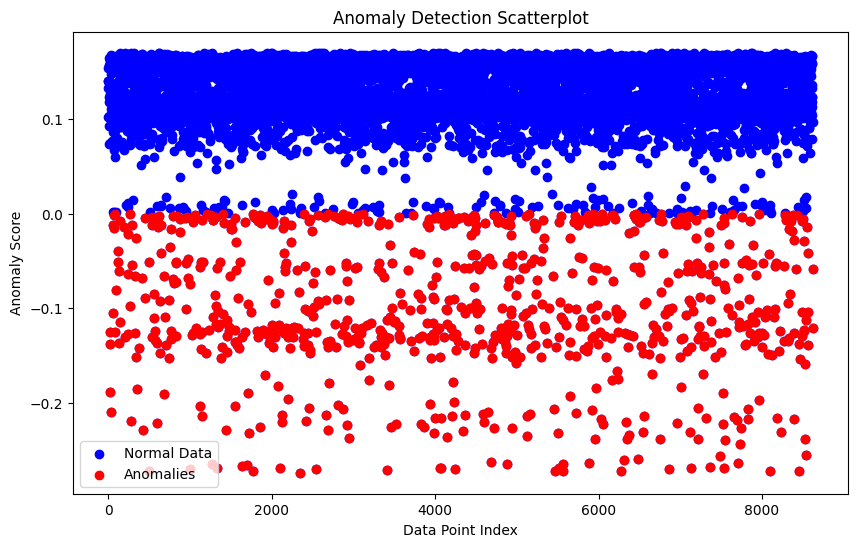

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Assuming you have a DataFrame 'df' with your data

# Create and train an Isolation Forest model
model = IsolationForest(contamination='auto', random_state=42)
# 'contamination' can be set to a specific value or 'auto' to estimate it
model.fit(df.select_dtypes(include=['number']))  # Fit to numerical features

# Get anomaly scores
df['anomaly_score'] = model.decision_function(df.select_dtypes(include=['number']))

# Set a threshold for identifying anomalies (you may need to adjust this)
threshold = 0  # Example threshold, adjust as needed

# Create a scatterplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(df.index, df['anomaly_score'], c='blue', label='Normal Data')
plt.scatter(df[df['anomaly_score'] < threshold].index,  # Use '<' for anomalies
            df[df['anomaly_score'] < threshold]['anomaly_score'],  # Use '<' for anomalies
            c='red', label='Anomalies')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection Scatterplot')
plt.legend()
plt.show()

## Summary:

### 1. Q&A

* **Q: What is the accuracy of the trained Random Forest model on the testing set?**
    * **A:** The model achieved an accuracy of 0.8918 on the testing set.
* **Q: How does the model's performance on the testing set compare to the validation set?**
    * **A:** The model shows a slight improvement in accuracy, precision, and F1-score on the testing set compared to the validation set, while recall slightly decreased. This suggests the model is generalizing well and not significantly overfitting.


### 2. Data Analysis Key Findings

* The dataset contained no missing values.
* Several numerical features had outliers, which were handled using winsorization (clipping values beyond the 5th and 95th percentiles).
* Time-based features like hour, day of the week, and month were extracted from the 'Timestamp' column.
* An interaction feature, 'TrafficVolume', was created by multiplying 'Flow Bytes/s' and 'Flow Packets/s'.
* Numerical features were standardized using StandardScaler.
* The Random Forest model achieved a testing set accuracy of 0.8918, precision of 0.8559, recall of 0.9305, and F1-score of 0.8916.
* Compared to the validation set, the testing set performance showed a slight improvement in accuracy, precision and F1-score, while recall slightly decreased.


### 3. Insights or Next Steps

* **The Random Forest model demonstrates good performance in predicting network issues, providing a solid baseline for detecting potential failures.**
* **Further model optimization could be explored, especially if higher precision or recall is desired for specific use cases.** This could involve hyperparameter tuning, trying different algorithms, or incorporating more advanced feature engineering techniques.
